## Lets load our libraries and perform initial analysis of the main application dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('application_train.csv').sort_values('SK_ID_CURR').reset_index(drop=True)
test = pd.read_csv('application_test.csv').sort_values('SK_ID_CURR').reset_index(drop=True)
#bureau = pd.read_csv('bureau.csv').sort_values(['SK_ID_CURR','SK_ID_BUREAU']).reset_index(drop = True)
#bureau_balance = pd.read_csv('bureau_balance.csv').sort_values('SK_ID_BUREAU').reset_index(drop = True)
#credit = pd.read_csv('credit_card_balance.csv').sort_values(['SK_ID_CURR', 'SK_ID_PREV']).reset_index(drop = True)
#installments = pd.read_csv('installments_payments.csv').sort_values(['SK_ID_CURR', 'SK_ID_PREV']).reset_index(drop = True)
#cash = pd.read_csv('POS_CASH_balance.csv').sort_values(['SK_ID_CURR', 'SK_ID_PREV']).reset_index(drop = True)
#previous = pd.read_csv('previous_application.csv').sort_values(['SK_ID_CURR', 'SK_ID_PREV']).reset_index(drop = True)


In [3]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train.shape


(307511, 122)

In [5]:
train['TARGET'].value_counts() # our data is imbalanced, only 8.78% data are those who defaulted. 

0    282686
1     24825
Name: TARGET, dtype: int64

In [6]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

###### There are 16 categorical variables which will need encoding

In [8]:
#Lets observe missing values
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
missing_table = missing_values_table(train)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


# Lets make 2 visualizations (only) of the dataset for the challenge

In [10]:
train['DAYS_BIRTH']= train['DAYS_BIRTH']*-1



In [11]:
train['YEAR_BIRTH']=train['DAYS_BIRTH']/365
train['YEAR_BIRTH'].head()

0    25.920548
1    45.931507
2    52.180822
3    52.068493
4    54.608219
Name: YEAR_BIRTH, dtype: float64

## Lets see how age affects repayment 

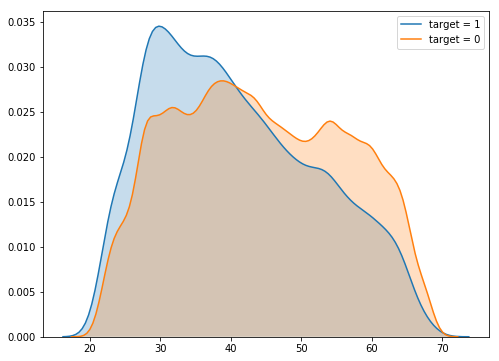

In [12]:

plt.figure(figsize = (8, 6))
sns.kdeplot(train.loc[train['TARGET']==1,'YEAR_BIRTH'],shade=True, label='target = 1')
sns.kdeplot(train.loc[train['TARGET']==0,'YEAR_BIRTH'],shade=True, label='target = 0')
                  

### The above graph shows younger people tend to default more than olders as the graph of defaulted customers are skewed to the left. Next we check gender map with year and create categories of age classes to see exactly which group is defaulting the most

### Lets dig deep and see what age categories are most likely to default 

In [13]:
# Lets take Age information, target and gender into a separate dataframe
df_age = train[['TARGET', 'YEAR_BIRTH','CODE_GENDER']]

# Bin the age data
df_age['YEARS_BINNED'] = pd.cut(df_age['YEAR_BIRTH'], bins = np.linspace(20, 70, num = 10))
df_age.head(10)

C:\Users\Fawad\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,TARGET,YEAR_BIRTH,CODE_GENDER,YEARS_BINNED
0,1,25.920548,M,"(25.556, 31.111]"
1,0,45.931507,F,"(42.222, 47.778]"
2,0,52.180822,M,"(47.778, 53.333]"
3,0,52.068493,F,"(47.778, 53.333]"
4,0,54.608219,M,"(53.333, 58.889]"
5,0,46.413699,M,"(42.222, 47.778]"
6,0,37.747945,F,"(36.667, 42.222]"
7,0,51.643836,M,"(47.778, 53.333]"
8,0,55.065753,F,"(53.333, 58.889]"
9,0,39.641096,M,"(36.667, 42.222]"


In [14]:
age_mean = df_age.groupby('YEARS_BINNED').mean()
age_mean

,TARGET,YEAR_BIRTH
YEARS_BINNED,,
"(20.0, 25.556]",0.120556,23.680173
"(25.556, 31.111]",0.111301,28.574569
"(31.111, 36.667]",0.099283,33.878571
"(36.667, 42.222]",0.084212,39.414130
"(42.222, 47.778]",0.076045,44.907430
"(47.778, 53.333]",0.070607,50.562983
"(53.333, 58.889]",0.057587,56.022896
"(58.889, 64.444]",0.053454,61.516160
"(64.444, 70.0]",0.042071,66.070467


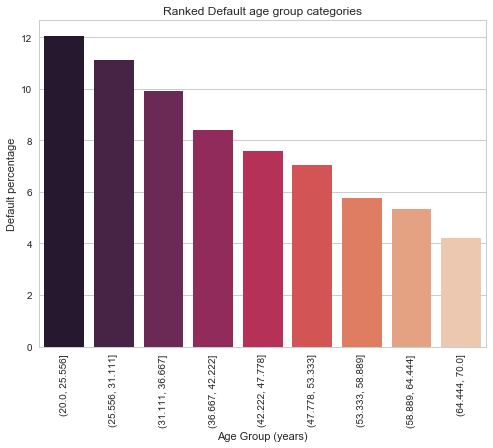

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
sns.barplot(age_mean.index.astype(str), 100 * age_mean['TARGET'], data =age_mean, palette='rocket')
#sns.barplot(age_mean.index.astype(str), df_age['CODE_GENDER'], data = df_age)
# Plot labeling
plt.xticks(rotation = 'vertical'); plt.xlabel('Age Group (years)'); plt.ylabel('Default percentage')
plt.title('Ranked Default age group categories');

# Rough draft of the machine learning process for finding AOC

In [18]:
categorical =train.select_dtypes(include = ['object'])

In [20]:
categorical.apply(pd.Series.nunique,axis=0) #seeing how many unique categorical values are in each column 

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [21]:
#making dummy variable transformations
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [22]:
print(train.shape)
print(test.shape)


(307511, 231)
(48744, 226)


In [23]:
y = train['TARGET']

In [28]:
#lets align
train, test = train.align(test, join= 'inner', axis=1)
print('Training data shape is ',(train.shape))
print('Testing data shape is ',(test.shape))

Training data shape is  (307511, 226)
Testing data shape is  (48744, 226)


In [29]:
#putting target back in training data
train['TARGET']= y

print(train.shape)
print(test.shape)


(307511, 227)
(48744, 226)


In [31]:
from sklearn.preprocessing import MinMaxScaler, Imputer

train_1 = train.copy()
test_1 = test.copy()

In [32]:
test_1.shape

(48744, 226)

In [35]:
x = train.drop(['TARGET'], axis=1) #training data withot target


In [37]:
imputer = Imputer(strategy = 'median')
imputer.fit(x)
x =imputer.transform(x)


imputer = Imputer(strategy = 'median')
imputer.fit(test)
test =imputer.transform(test)

In [38]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(x)
x = scaler.transform(x)

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(test)
test = scaler.transform(test)

## Lets bulid our first "Naive" model without any feature selection

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logistic_reg = LogisticRegression(C=0.00001)

In [41]:
logistic_reg.fit(x,y)

LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
prediction_logistic = logistic_reg.predict_proba(test)[:,1]

In [ ]:
# Submission dataframe
submit = test_1[['SK_ID_CURR']]
submit['TARGET'] = prediction_logistic

submit.shape

In [ ]:
# Save the submission to a csv file
submit.to_csv('log_reg_baseline.csv', index = False)

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, n_jobs = -1)

In [44]:
# Train on the training data
random_forest.fit(x, y)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
#feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]